<a href="https://colab.research.google.com/github/MeSamiulIslam/Msc/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree

In [2]:
url = "https://raw.githubusercontent.com/MeSamiulIslam/Msc/main/game%20data.csv"
df = pd.read_csv(url)
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [3]:
df = df.drop("Days", axis=1)

In [4]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [5]:
inputs = df.drop('Wear Jacket?', axis=1)
inputs

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [6]:
target = df[['Wear Jacket?']]
target

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes
5,No
6,No
7,No


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
inputs ['Outlook_n'] = le.fit_transform(inputs['Outlook'])
inputs ['Temprature_n'] = le.fit_transform(inputs['Temprature'])
inputs ['Routine_n'] = le.fit_transform(inputs['Routine'])

In [9]:
inputs

,Outlook,Temprature,Routine,Outlook_n,Temprature_n,Routine_n
0,Sunny,Cold,Indoor,1,0,0
1,Cloudy,Cold,Indoor,0,0,0
2,Cloudy,Warm,Outdoor,0,1,1
3,Sunny,Cold,Outdoor,1,0,1
4,Cloudy,Cold,Outdoor,0,0,1
5,Sunny,Warm,Outdoor,1,1,1
6,Cloudy,Warm,Indoor,0,1,0
7,Sunny,Warm,Indoor,1,1,0


In [10]:
inputs_n = inputs.drop(['Outlook', 'Temprature', 'Routine'], axis=1) #if u dont want to create new variable use inplace=True

In [11]:
inputs_n

,Outlook_n,Temprature_n,Routine_n
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [12]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [13]:
#Outlook -> Sunny, Cloudy = (1, 0)
#Temperature -> Cold, Warm = (0, 1)
#Routine -> Indoor, Outdoor = (0, 1)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [15]:
dt.fit(inputs_n,target) # training decison tree model

DecisionTreeClassifier()

In [16]:
inputs_n.Temprature_n.unique()

array([0, 1])

[Text(0.6, 0.875, 'Temprature_n <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook_n <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine_n <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

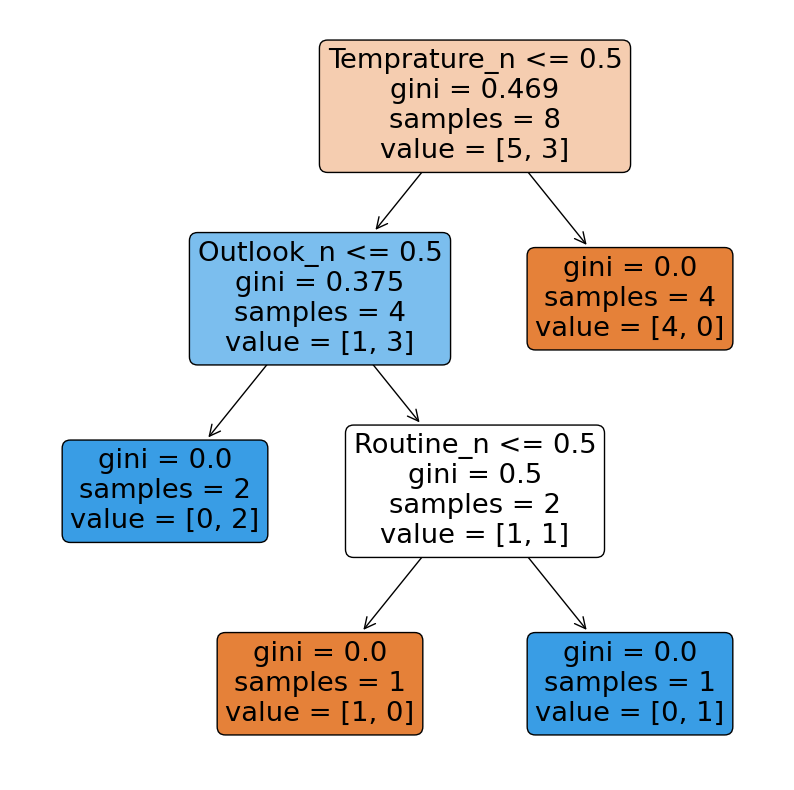

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(dt, filled=True, rounded=True, feature_names=inputs_n.columns)

In [18]:
dt.predict([[1,0,0]]) #  Sunny, Cold , Indoor

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [19]:
dt.predict([[1,1,0]]) #  Sunny, Cold , Indoor

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [21]:
dt.predict([[1,1,1]]) #  Sunny, Cold , Indoor

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [23]:
dt.predict([[0,1,1]]) #  Sunny, Cold , Indoor

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [24]:
dt.predict([[0,0,1]]) #  Sunny, Cold , Indoor

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)